# Projeto - Employees Data

Vamos utilizar conceitos de manipulação de Data e Inteligência de Dados para criar um arquivo Power BI usando o DataFrame `employees_sample_data`

Com o arquivo gerado, ao final, retiraremos insights valiosos da empresa que nos forneceu esta base de dados


Sinta-se à vontade para salvar este projeto e testá-lo. Recomendo especialmente para aqueles que estão nos inícios dos estudos de Power BI, verificando como iniciei de uma base de dados bruta, a manipulei e posteriormente transformei ela em dados visuais no PowerBI.

Agradeço desde já pela sua atenção, e use este projeto com carinho!

# 1- Primeiras Impressões

Vamos ter um panorama inicial do arquivo `employee_sample_data.xlsx` disponibilizado para nossos estudos

In [96]:
import pandas as pd
import seaborn as sns
import numpy as np

In [97]:
data = pd.read_excel('employee_sample_data.xlsx')
data.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   EEID           1000 non-null   object        
 1   Full Name      1000 non-null   object        
 2   Job Title      1000 non-null   object        
 3   Department     1000 non-null   object        
 4   Business Unit  1000 non-null   object        
 5   Gender         1000 non-null   object        
 6   Ethnicity      1000 non-null   object        
 7   Age            1000 non-null   int64         
 8   Hire Date      1000 non-null   datetime64[ns]
 9   Annual Salary  1000 non-null   int64         
 10  Bonus %        1000 non-null   float64       
 11  Country        1000 non-null   object        
 12  City           1000 non-null   object        
 13  Exit Date      85 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 109.5

# 2- Formatação/Limpeza dos dados

- Limpeza de indices incorretos no `Job Title`

In [99]:
data['Job Title'] = data['Job Title'].apply(lambda x: 'Sr. Manager' if x == 'Sr. Manger' else x)
data['Job Title'] = data['Job Title'].apply(lambda x: 'System Administrator' if x == 'System Administrator\xa0' else x)

data.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT


# 3- Manipulação de Dados

Aqui criaremos novas colunas no Banco de Dados para incrementar nossas informações.

- **Years of Service**: Esta informa os anos de servico exercido pelo colaborador no cargo respectivo;
- **Hired**: Coluna com indices 1 (colaborador ainda contratado) ou 0 (colaborador não mais contratado);
- **Category**: Com base no tempo de servico do funcionário, informa a categoria dele. Teremos funcionários Iniciantes, Intermediários e Veteranos

## 3.1- Coluna `Years of Service`

Vamos definir os Exit Date nulos como o dia de hoje para calcular os anos de serviços de todos os funcionários. Após isso, retornamos os valores nulos

In [100]:
import datetime

# transformando os valores nulos na data de hoje
data['Exit Date'].fillna(pd.to_datetime(datetime.date.today()), inplace=True)
data.head()

# calculo de anos de servico
data['Years of Service'] = round((data['Exit Date'] - data['Hire Date']).dt.days / 365, 1)

# transformando novamente o que for == data de hoje em NaN
data_de_hoje = datetime.date.today()
data.loc[data['Exit Date'] == pd.to_datetime(data_de_hoje), 'Exit Date'] = np.nan

## 3.2- Coluna `Hired`

Esta coluna retornará: \
 0 == funcionário **não** mais contratado \
 1 == funcionário ainda contratado

In [101]:
# condicionando q caso instancia for nula == 0
data['Hired'] = data['Exit Date'].apply(lambda x: 0 if pd.notna(x) else 1)

In [102]:
data.head(2)

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Years of Service,Hired
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16,5.5,0
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT,26.2,1


## 3.3- Categorização de Funcionários

Vamos separar em categorias cada funcionário de acordo com o tempo de atividade na empresa: \
**vet** = Veterano \
**int** = Intermediário \
**new** = Novo 


Para isso, usaremos a coluna `Years of Service` para calcular o tempo de serviço dos funcionários;
Vamos criar também uma função que aplique a filtragem das instancias, para depois aplicarmos no DataFrame

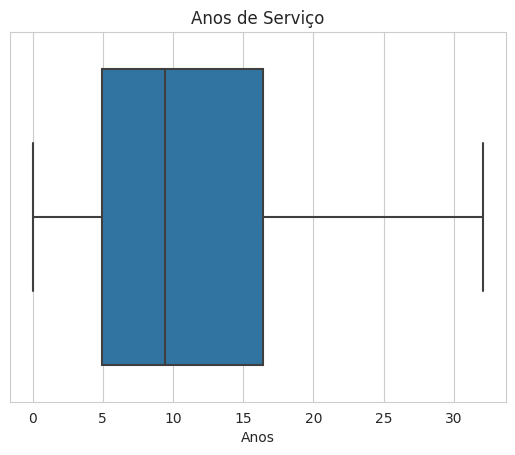

In [103]:
# verificando os anos de servico dos funcionarios da empresa
with sns.axes_style('whitegrid'):
  year_grafic = sns.boxplot(x=data['Years of Service'])
  year_grafic.set(title='Anos de Serviço', xlabel='Anos')

- A maioria dos funcionários acomulam/acomularam de 5 a 15 anos de permanência na empresa
- A média varia de 8 a 10 anos \
\
Com isso, vamos supor que até 5 anos ainda é uma pessoa bem nova na empresa, enquanto acima de 15 anos de empresa já é alguem bem mais familiarizado com o seu trabalho e ambiente.

Criando a função que categoriza os funcionários

In [104]:
def category_filter(years):
  if years <= 5:
    return 'New'
  elif years <= 15:
    return 'Intermediate'
  else:
    return 'Veteran'

Aplicando a função `category_filter`

In [105]:
# aplicando a funcao
data['Category'] = data['Years of Service'].apply(category_filter)
data.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date,Years of Service,Hired,Category
0,E02387,Emily Davis,Sr. Manager,IT,Research & Development,Female,Black,55,2016-04-08,141604,0.15,United States,Seattle,2021-10-16,5.5,0,Intermediate
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,1997-11-29,99975,0.00,China,Chongqing,NaT,26.2,1,Veteran
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,2006-10-26,163099,0.20,United States,Chicago,NaT,17.3,1,Veteran
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,2019-09-27,84913,0.07,United States,Chicago,NaT,4.3,1,New
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,1995-11-20,95409,0.00,United States,Phoenix,NaT,28.2,1,Veteran


## 3.4- Retoques na estrutura do DataFrame

Vamos fazer as ultimas manipulações para deixar o DF mais fácil de retirar informações uteis

- Renomeação de colunas
- Ordenação do DF

In [110]:
# dict() para substituicao de colunas
columns_name = {'Job Title': 'Job',
               'Business Unit': 'Business',
               'Annual Salary': 'Salary',
               'Bonus %': 'Bonus'}
# aplicando o dict()
data = data.rename(columns=columns_name)

# reorganizando colunas
x = ['EEID','Job','Department','Business','Gender','Ethnicity','Age','Salary','Bonus','Country','Hire Date','Exit Date','Years of Service','Hired','Category']
data = data[x]

# alterando `Salary` como float
data['Salary'] = data['Salary'].astype(float)

# para evitar erros de indices ao importar os dados no BI,
# alteraremos os dados floats em str
data['Bonus'] = data['Bonus'].astype(str)
data['Years of Service'] = data['Years of Service'].astype(str)

# para evitarmos dados nulos na manipulação do BI, vamos definir
# as datas nulas como a data de hoje
data['Exit Date'].fillna(pd.to_datetime(datetime.date.today()), inplace=True)

# reordenando o DF pelos departamentos
data = data.sort_values(by=['Department','Business'])

In [111]:
data.head(2)

,EEID,Job,Department,Business,Gender,Ethnicity,Age,Salary,Bonus,Country,Hire Date,Exit Date,Years of Service,Hired,Category
168,E00085,Vice President,Accounting,Corporate,Female,Asian,56,190815.0,0.4,United States,2014-03-16,2024-01-29,9.9,1,Intermediate
231,E03547,Analyst,Accounting,Corporate,Male,Asian,28,52069.0,0.0,China,2017-05-12,2024-01-29,6.7,1,Intermediate


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 168 to 988
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   EEID              1000 non-null   object        
 1   Job               1000 non-null   object        
 2   Department        1000 non-null   object        
 3   Business          1000 non-null   object        
 4   Gender            1000 non-null   object        
 5   Ethnicity         1000 non-null   object        
 6   Age               1000 non-null   int64         
 7   Salary            1000 non-null   float64       
 8   Bonus             1000 non-null   object        
 9   Country           1000 non-null   object        
 10  Hire Date         1000 non-null   datetime64[ns]
 11  Exit Date         1000 non-null   datetime64[ns]
 12  Years of Service  1000 non-null   object        
 13  Hired             1000 non-null   int64         
 14  Category          1000 non-n

# 4- Salvando o DF

Vamos gerar o arquivo `employees.csv` para utilizar posteriormente no Power BI como fonte de dados

In [113]:
data.to_csv('./employees.csv', sep=',', index=False)

# 5- Data Inteligence em PowerBI

Instale e acesse o arquivo .pbix `data-analysis.pbix` disponivel em meu perfil no GitHub para utilizar do arquivo Power BI que criei com base nesses dados e verifique as análises possíveis de serem feitas com os dados

[Link do arquivo PowerBI](https://github.com/VictorCamolese/CompleteProjects/blob/main/data-inteligence-employees/data-analysis.pbix)

## 5.1- Insights

Segue alguns insights relevantes que pude retirar sobre esta empresa e sua composição de funcionários

**Composição de Funcionários por Sexo**
- O número de funcionários totais ja contratados e também os atualmente presentes na empresa são em maioria do sexo feminino; É possivel notar também que a maioria dos funcionários demitidos são do sexo masculino;
- A maior quantidade de funcionários contratados se encontram no departamento de TI, isso com grande vantagem em relação aos outros departamentos;
- Dentre os outros departamentos, além de TI e Marketing, as mulheres tem em grande parte notável vantagem em quantidade;
- Em questão de salários anuais é possível notar que **homens tem vantagem em valores de média salarial** na maioria dos setores, inclusive no setor Financeiro onde ironicamente a grande maioria dos funcionários são do sexo feminino mas ainda assim a média salárial dos homens é maior que o das mulheres;
- Mesmo sendo o setor de maior número de funcionários presentes, o departamento de TI possui a menor média de Salário Anual dentre todos os setores da empresa
- Em geral, a retenção de funcionários da empresa é de um nível elevado; Em ambos sexos, mais de 90% dos funcionários já contratados se mantém ativos na empresa, isso demonstra um possível sinal de estabilidade na corporação;
- Sinais de **desvantagem na média salarial feminina podem ser vistos nos setores: Vendas, Engenharia e Financeiro**. Estes setores são predominantementes compostos por mulheres, porém a média salarial masculina é maior do que a feminina em todos. É interessante verificar os critérios estabelecidos para que esta característica viesse a ocorrer nos setores respectivos

**Conclusão** \
A empresa apresenta ter uma tendência a contratar e manter preferencialmente funcionários do sexo feminino, como vemos em que somente 2 departamentos dos 7 existentes tem, em sua maioria, homens. Porém, a média salarial masculina apresenta vantagem na maioria dos departamentos, inclusive nos que apresentam mais mulheres contratadas. 

---

**Composição de Funcionários por Etnias**
- Asiáticos possuem a maioria em quantidade de funcionários contratados, estes trabalhando na China e nos EUA, enquanto caucasianos e latinos tem valores próximos em número. Negros apresentam uma expressiva minoria de números de contratados, estes presentes somente dos EUA;
- Os latinos, sendo o 3° maior grupo etnico da empresa, são contratados do Brasil e EUA, com sua maioria presente no país latino-americano;
- Em geral, a dispersão em relação Salário Anual x Tempo de Empresa não demonstra um sinal de correlação, ou seja, não apresenta um sinal que o valor do salário anual influencíe na permanencia do funcionário na empresa. Geralmente os outliers em questão de salário não possuem grande tempo de empresa, enquanto a maioria dos outliers de tempo empresarial não apresentam um grande valor total de salário anual;
- É possível observar que os funcionários com maiores valores de salário anual e tempo empresarial exercem ou exerceram mais de um cargo dentro da empresa, por isso os valores extensos;
- Quanto aos brasileiros, verificamos uma tendência de uma permanência e valor salarial mediana na empresa, enquanto os latinos Norte Americanos apresentam grandes vantagens nesses respectivos valores. Asiáticos também apresentam esta característica semelhantemente, porém de forma bem mais distribuida. Os valores de permanência e salario são bem mais distribuidos entre os asiáticos norte americanos e chineses, porém os outliers são somente dos EUA;
- O número de funcionários de categoria Intermediária são a grande maioria, ou seja, isso traz concordância com a suposição na página anterior de a permanência dos funcionários na empresa ter um índice positivo. Verificamos isto também a verificar que a quantidade de funcionários novos é muito menor comparado às outras. De certa forma, isso pode demontrar tanto um fator positivo à empresa, mostrando estabilidade na retenção de funcionários, quanto também algo negativo, ao demonstrar  uma certa dificuldade de abraçar futuros novos funcionários ou iniciantes no mercado

**Conclusão** \
A empresa é formada em sua maioria por norte americanos, estes predominantemente caucasianos. Porém, o maior grupo étnico presente, em grande maioria, é o asiático. Aparenta demonstrar vantagem à funcionários dos EUA em questões salariais, como vemos no caso dos latinos. Os negros apresentam grande desvantagem em quantidade de funcionários, porém com salarios e tempo empresarial dentro das médias de outras etnias. Porém, verificamos o pouco numero de funcionários negros com pouco tempo empresarial, o que demonstra uma tendência de que o numero deste grupo não aumente suficientemente para mostrar um numero expressivo quanto a quantidade dos outros grupos etnicos presentes na empresa

---

**Permanência de Funcionários na Empresa**
- A tendência de funcionários contratados é constante, enquanto são raros e em poucos numeros a quantidade de funcionários demitidos;
- Este fato demonstra, ao menos em questão interna, um tendente crescimento da empresa. Em 2021 por exemplo é visto a maior quantidade de funcionários demitidos (20) enquanto no mesmo ano se teve o recorde de funcionários contratados (81). A tendência é que mais funcionários sejam contratados do que estes sejam demitidos;
- O setor de TI apresenta funcionários majoritariamente voltados no mercado de fabricação, provavelmente relacionado a manutenção, construção e análise de sistemas, projetos e/ou produtos tecnológicos. Pode demonstrar um sinal que esta empresa trabalha muito provavelmente no ramo Tech. Não somente nesse Business, o departamento de TI é maioria em todos as areas de mercado da empresa;
- O setor de vendas tem sua maioria presente no mercado de Produtos Especiais, podendo demonstrar uma atenção extra tambem para essa area de mercado da empresa, no foco de vender produtos específicos;
- Embora o numero de demissões não seja expressivo quanto o de admissões, é notável verificar que o setor que mais sofreu com isto foi o de Engenharia e o mercado de fabricação/manutenção. Isso pode demonstrar uma maior instabilidade neste departamento do que o de TI por exemplo, em que o TI expressivamente maior em numeros de funcionários sofreu menos demissões que o departamento de engenheiros.

**Conclusão** \
O crescimento interno da empresa é expressivo ao verificarmos o constante e crescente numero de admissões, enquanto as demissões geralmente mantém-se em valores baixos. Em 2021 apresenta crescimento com maior expressão da empresa, com recordes de admissões e demissões, o ulltimo que no caso ainda assim não aparenta ter afetado a empresa negativamente, sendo ainda baixo o numero de funcionários demitidos. Por fim, a empresa aparenta dar maior atenção em areas tecnológicas, isso pois a maior quantidade de funcionários estão presentes no departamento de TI e em todas as areas de Business da empresa, estes são maioria. Muito provavelmente estamos lidando com uma empresa focada no ramo Tech.


# 6- Contato

Agradeço a atenção e espero que este projeto te auxilie em alguma forma. Recomendo especialmente o proveito deste projeto para iniciantes nos estudos de Data e Power BI, montei-o com grande carinho e espero que seja util para você assim como foi para mim.

Sinta-se a vontade para me contatar nos seguintes canais:

[**Linkedin**](https://www.linkedin.com/in/victorcamolese/) \
[**Instagram**](https://www.instagram.com/victorcamolese?igsh=bmw0aGVoZHI4dWJ5) \
**victorcamolese@gmail.com**